In [17]:
import os
from glob import glob
import numpy as np
import pandas as pd
import mne
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [18]:
# !conda install -y gdown
# !gdown --id 1VK-fEgZ_lMLmBXpyM0vXWLsawbK9uhBx
# !gdown --id 1SpTGCXThIQXZJjB0XXIICKJl-joKi2ct
# !gdown --id 1-523ebE1L50tcgn08Enl-ggQ8MYjhWPO

In [19]:
data=r'/kaggle/working/session1_sub10_reaching_realMove.vhdr'
raw = mne.io.read_raw_brainvision(data, preload=True)

Extracting parameters from /kaggle/working/session1_sub10_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 9804299  =      0.000 ...  3921.720 secs...


In [20]:
# data=r'F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_ME\motorexecution_subject1_run1.gdf'
# raw=mne.io.read_raw_gdf(data,eog=['eog-r', 'eog-m', 'eog-l'],exclude=('thumb_near', 'thumb_far', 'thumb_index', 'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far', 'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX', 'handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination', 'Wrist', 'GripPressure'))

In [21]:
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage, on_missing='ignore')


# Create info object
info = raw.info

# Create layout
layout = mne.channels.find_layout(info, ch_type='eeg', exclude=['hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D', 'EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref'])


# Create epochs
events, _ = mne.events_from_annotations(raw)

epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=0.5, preload=True, event_repeated='merge')

# Select channels and create layout
picks = mne.pick_channels(epochs.ch_names, ['Fz', 'Cz', 'Pz', 'Oz'])




# Select channels and create layout
picks = mne.pick_types(raw.info, meg=False, eeg=True)
ch_names = [raw.info['ch_names'][i] for i in picks]
pos = mne.channels.layout._auto_topomap_coords(info, picks, ignore_overlap=True, to_sphere=True, sphere=None)
layout = mne.channels.layout.Layout(
    pos=pos, names=ch_names, box=(None, None), ids=picks, kind='custom')

Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
910 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 910 events and 1751 original time points ...
1 bad epochs dropped


Pre_Processing

In [28]:
freq_low = 8 # μ band
freq_high = 32 # β band

raw.filter(l_freq=freq_low, h_freq=freq_high, method='iir', iir_params=dict(order=4, ftype='butter', output='sos'), phase='zero-double')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 32 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 32.00 Hz: -6.02, -6.02 dB



<RawBrainVision | session1_sub10_reaching_realMove.eeg, 71 x 9804300 (3921.7 s), ~5.19 GB, data loaded>

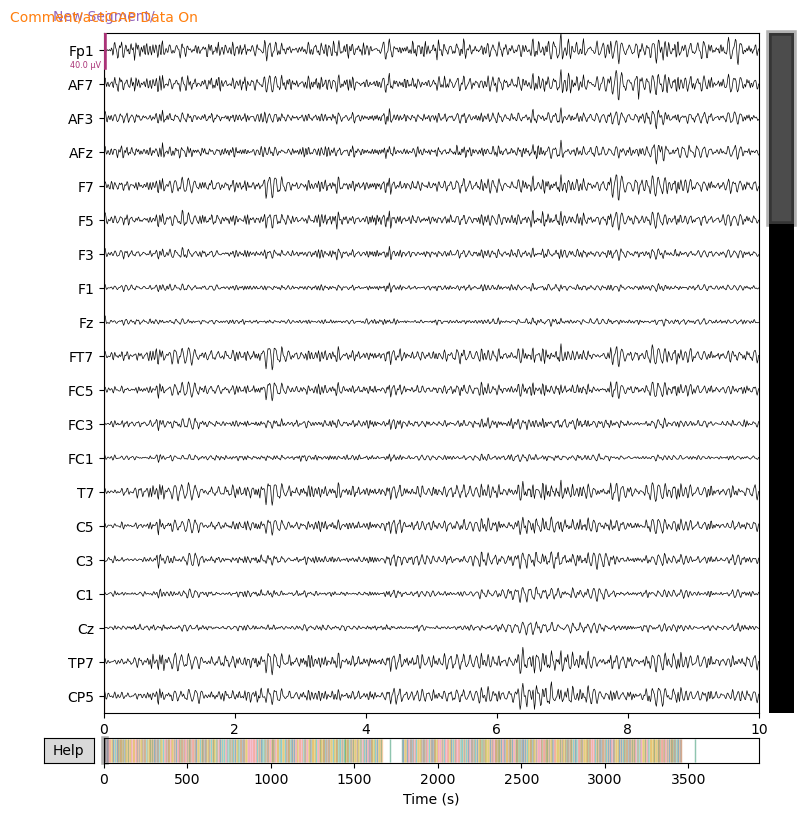

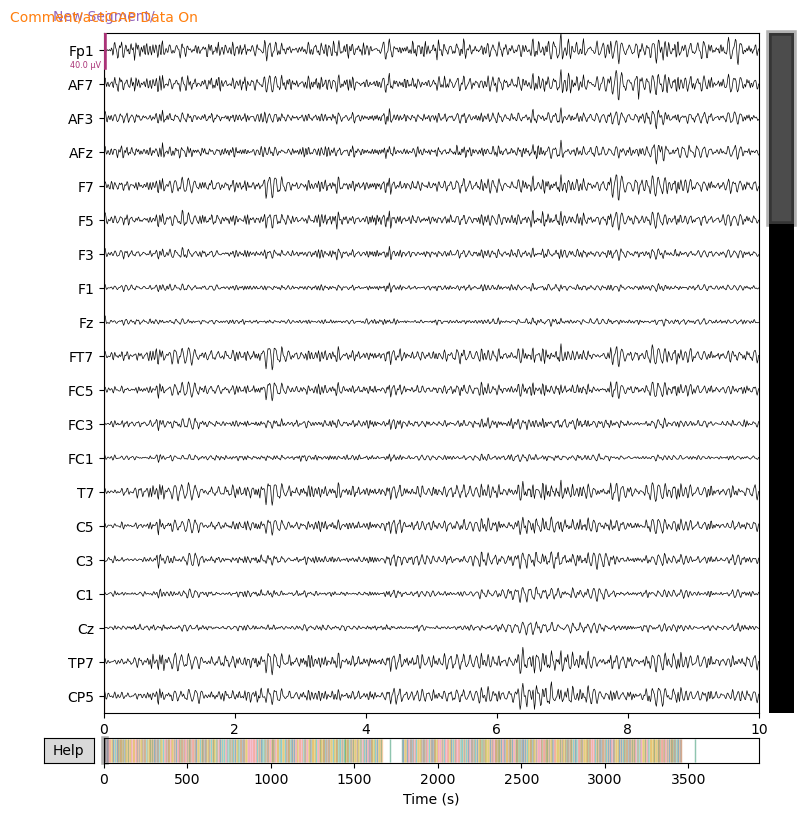

In [27]:
raw.plot()

In [31]:
selected=['AF7','AF3','AFz','F7','F5','F3','F1','Fz','FC5','FC3','FC1','FCz','T7','C5','C3','C1','Cz']#
# selected=['T7','C5','C3','C1','Cz']
raw = raw.pick_channels(selected)

In [32]:
raw

<RawBrainVision | session1_sub10_reaching_realMove.eeg, 16 x 9804300 (3921.7 s), ~1.17 GB, data loaded>

In [33]:
# # ica = mne.preprocessing.ICA(method='fastica') 

# ica = mne.preprocessing.ICA(method='infomax', max_iter=1000) # to Use parallel processing 

# ica.fit(raw)

# with open('ica.pickle', 'rb') as f:
#      ica = pickle.load(f)


Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 16 components
 
Fitting ICA took 2650.0s.


Method,infomax
Fit,1000 iterations on raw data (9804300 samples)
ICA components,16
Available PCA components,16
Channel types,eeg
ICA components marked for exclusion,—


In [37]:
import pickle

# with open('ica_o.pickle', 'wb') as f:
#     pickle.dump(ica, f)

with open('ica_o.pickle', 'rb') as f:
     ica = pickle.load(f)

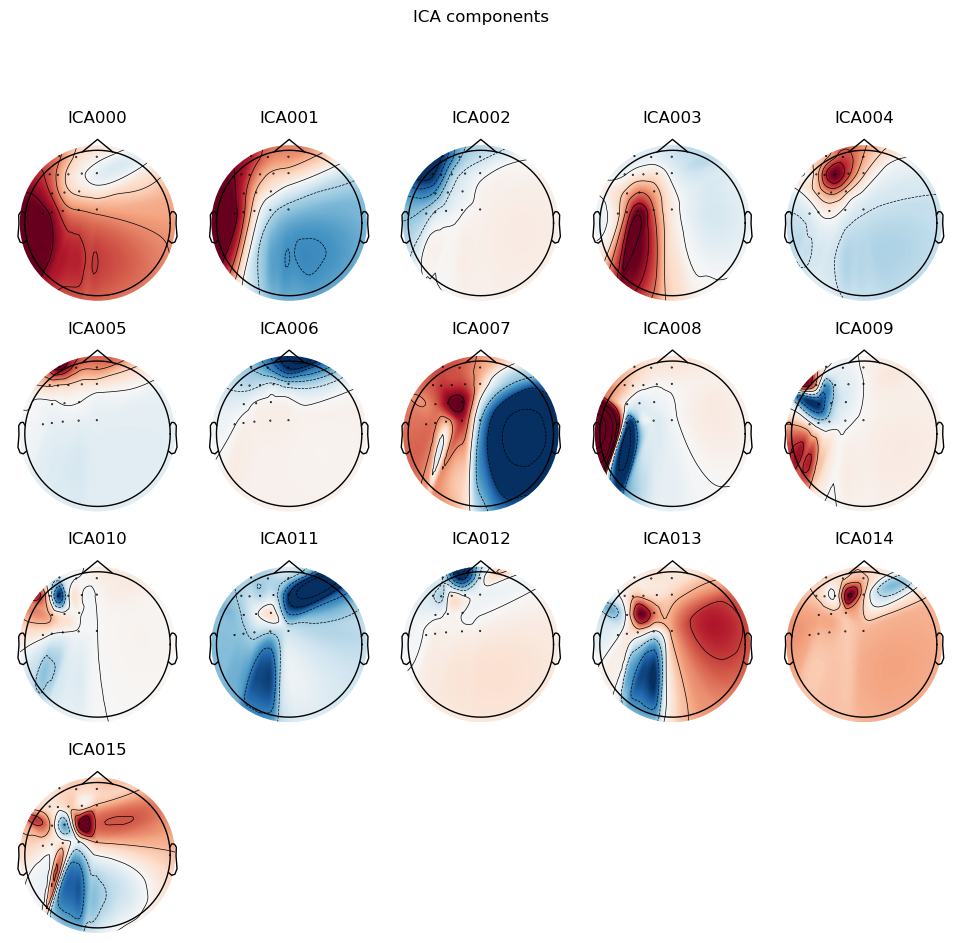

[<MNEFigure size 975x967 with 16 Axes>]

In [35]:
ica.plot_components()

In [38]:
ica

Method,infomax
Fit,1000 iterations on raw data (9804300 samples)
ICA components,16
Available PCA components,16
Channel types,eeg
ICA components marked for exclusion,—


In [39]:
ica.exclude = [0, 1, 2]

# Apply the selected ICs to the data
raw_corrected = raw.copy()
ica.apply(raw_corrected)


Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 3 ICA components
    Projecting back using 16 PCA components


<RawBrainVision | session1_sub10_reaching_realMove.eeg, 16 x 9804300 (3921.7 s), ~1.17 GB, data loaded>

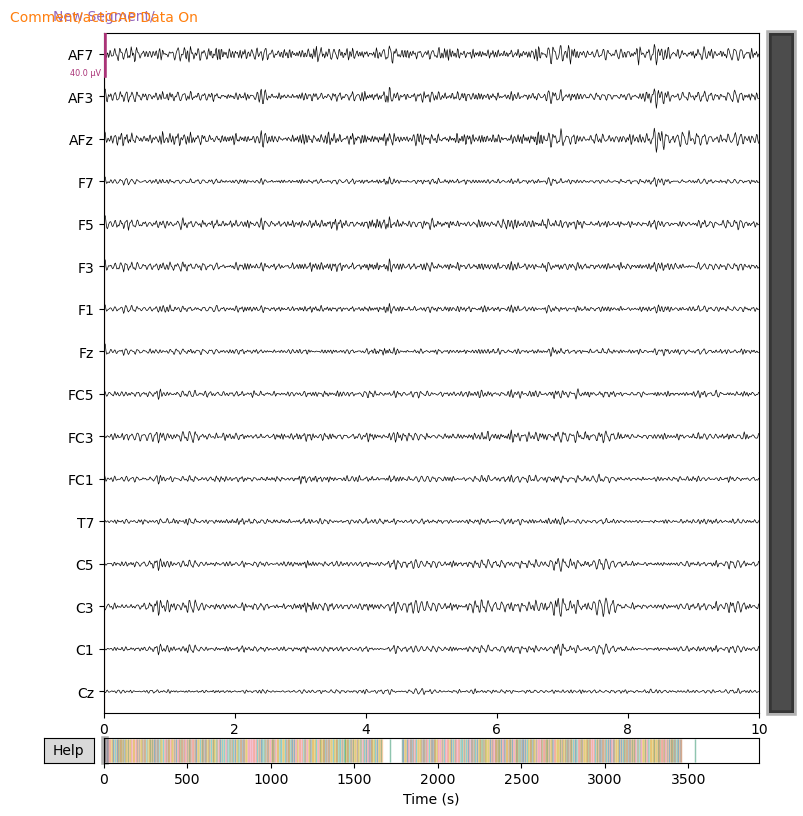

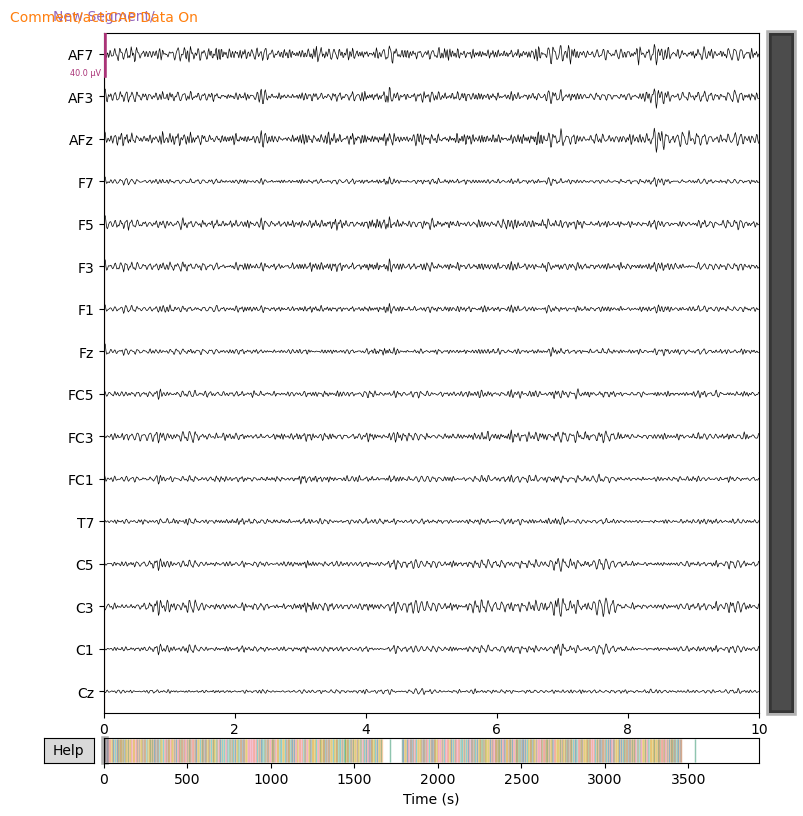

In [40]:
raw_corrected.plot()

In [41]:
row = raw_corrected.copy()

In [42]:
ch=raw.ch_names

In [43]:
len(ch)

16

In [44]:
ch

['AF7',
 'AF3',
 'AFz',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'FC5',
 'FC3',
 'FC1',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz']

In [45]:
#raw.drop_channels(['eog-r', 'eog-m', 'eog-l'])

######     1-1. Arm reaching

         class       Forward   Backward    Left    Right    Up    Down   Rest
   --------------  ---------   ----------  ------  -------  ------  ------  ------
    trigger code     S 11        S 21      S 31    S 41    S 51   S 61     S 8

In [46]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']


In [47]:
events[1]

{'Comment/ControlBox is not connected via USB': 10001,
 'Comment/actiCAP Data On': 10002,
 'Comment/actiCAP USB Power On': 10003,
 'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4,
 'Stimulus/S  5': 5,
 'Stimulus/S  6': 6,
 'Stimulus/S  8': 8,
 'Stimulus/S 11': 11,
 'Stimulus/S 13': 13,
 'Stimulus/S 14': 14,
 'Stimulus/S 21': 21,
 'Stimulus/S 31': 31,
 'Stimulus/S 41': 41,
 'Stimulus/S 51': 51,
 'Stimulus/S 61': 61}

In [48]:
event_dict={
 'Forward': 11,
 'Backward ': 21,
 'Left': 31,
 'Right': 41,
 'UP': 51,
 'Down': 61,
 'Rest': 8,
}

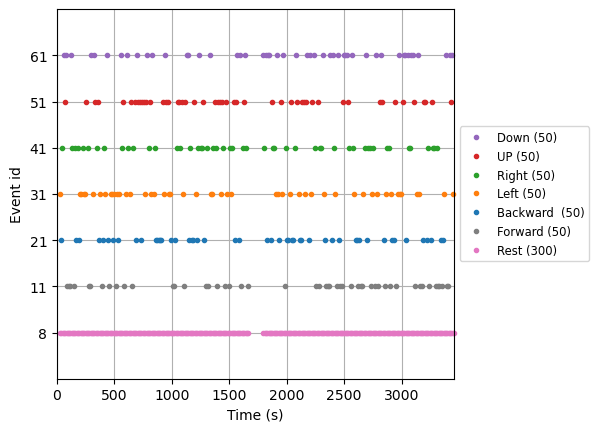

In [49]:
fig=mne.viz.plot_events(events[0][:],event_id=event_dict,sfreq=raw.info['sfreq'],
                       first_samp=raw.first_samp)

In [50]:
#  'Forward': 11,
#  'Backward ': 21,
#  'Left': 31,
#  'Right': 41,
#  'UP': 51,
#  'Down': 61,
#  'Rest': 8,
epoch=mne.Epochs(raw,events[0],event_id=[11,21,31,41,51,61,8],tmin=-0.1,tmax=0.7)

Not setting metadata
600 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [51]:
epoch.get_data().shape

Using data from preloaded Raw for 600 events and 2001 original time points ...
0 bad epochs dropped


(600, 16, 2001)

In [52]:
labels=epoch.events[:,-1]

In [53]:
labels

array([31,  8, 21,  8, 41,  8, 61,  8, 51,  8, 61,  8, 11,  8, 11,  8, 11,
        8, 61,  8, 41,  8, 11,  8, 41,  8, 21,  8, 41,  8, 21,  8, 31,  8,
       31,  8, 41,  8, 31,  8, 31,  8, 51,  8, 41,  8, 11,  8, 11,  8, 61,
        8, 31,  8, 61,  8, 51,  8, 41,  8, 51,  8, 21,  8, 31,  8, 11,  8,
       21,  8, 41,  8, 31,  8, 61,  8, 21,  8, 11,  8, 31,  8, 31,  8, 21,
        8, 31,  8, 11,  8, 31,  8, 21,  8, 31,  8, 61,  8, 41,  8, 51,  8,
       11,  8, 31,  8, 61,  8, 41,  8, 31,  8, 51,  8, 11,  8, 41,  8, 51,
        8, 21,  8, 61,  8, 51,  8, 51,  8, 21,  8, 51,  8, 51,  8, 31,  8,
       51,  8, 61,  8, 41,  8, 51,  8, 31,  8, 61,  8, 31,  8, 41,  8, 21,
        8, 21,  8, 21,  8, 21,  8, 21,  8, 51,  8, 31,  8, 61,  8, 51,  8,
       51,  8, 31,  8, 31,  8, 21,  8, 11,  8, 11,  8, 21,  8, 41,  8, 51,
        8, 51,  8, 41,  8, 51,  8, 31,  8, 11,  8, 51,  8, 61,  8, 61,  8,
       21,  8, 41,  8, 21,  8, 21,  8, 51,  8, 31,  8, 21,  8, 41,  8, 61,
        8, 41,  8, 41,  8

In [54]:
evoked_1=epoch['11'].average()
evoked_2=epoch['21'].average()
evoked_3=epoch['31'].average()
evoked_4=epoch['41'].average()
evoked_5=epoch['51'].average()
evoked_6=epoch['61'].average()
evoked_7=epoch['8'].average()

In [55]:
dicts={
#  'Forward': evoked_1,
#  'Backward': evoked_2,
 'Left': evoked_3,
 'Right': evoked_4,
#  'UP': evoked_5,
#  'Down': evoked_6,
#  'Rest': evoked_7,
       }

combining channels using "gfp"
combining channels using "gfp"


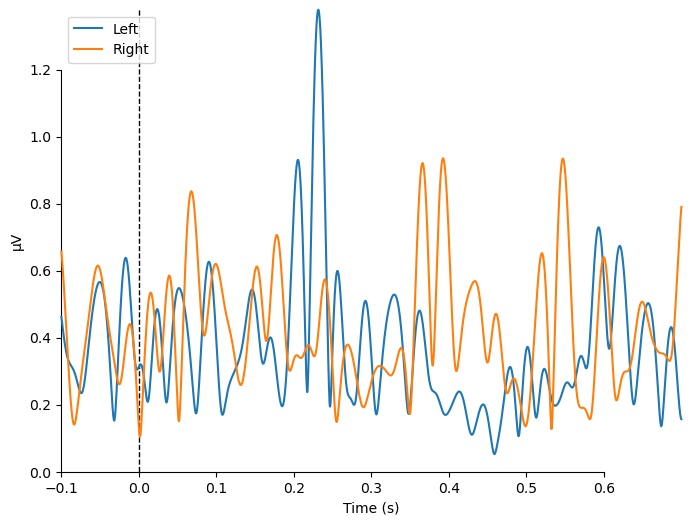

[<Figure size 800x600 with 1 Axes>]

In [56]:
mne.viz.plot_compare_evokeds(dicts)

combining channels using "gfp"
combining channels using "gfp"


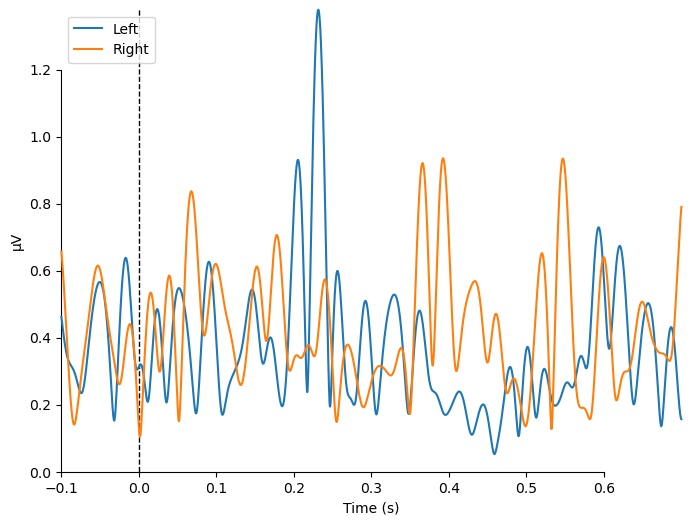

[<Figure size 800x600 with 1 Axes>]

In [57]:
mne.viz.plot_compare_evokeds(dicts)

In [58]:
labels.shape

(600,)

In [59]:
epoch.get_data().shape

Using data from preloaded Raw for 600 events and 2001 original time points ...


(600, 16, 2001)

In [60]:
selected=['AF7','AF3','AFz','F7','F5','F3','F1','Fz','FC5','FC3','FC1','FCz','T7','C5','C3','C1','Cz']

In [61]:
#raw.ch_names[:34]

In [62]:
def read_data(path):
    data=path
    raw = mne.io.read_raw_brainvision(data, preload=True)
    #raw.drop_channels(['eog-r', 'eog-m', 'eog-l'])
    raw.pick_channels(selected)
    raw.set_eeg_reference()
    #raw.resample(sfreq=256)
    #raw.filter(l_freq=0,h_freq=30)
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[11,21,31,41,51,61],tmin=-0.1,tmax=0.7)
    labels=epoch.events[:,-1]
    features=epoch.get_data()
    return features

In [63]:
def read_data_label(path):
    data=path
    raw = mne.io.read_raw_brainvision(data, preload=True)
    #raw.drop_channels(['eog-r', 'eog-m', 'eog-l'])
    raw.pick_channels(selected)
    raw.set_eeg_reference()
    #raw.resample(sfreq=256)
    #raw.filter(l_freq=0,h_freq=30)
    events=mne.events_from_annotations(raw)
    epoch=mne.Epochs(raw,events[0],event_id=[11,21,31,41,51,61],tmin=-0.1,tmax=0.7)
    labels=epoch.events[:,-1]
    features=epoch.get_data()
    return labels

# so lets read all data


In [64]:
# all_file=glob(r'F:\mohamed\4th_year_new\GRAD project\mine data\d 2017\S01_ME\*.gdf')
# print(len(all_file))

In [65]:
# file_paths=[i for i in all_file]

In [66]:
# len(file_paths)

In [67]:
# file_paths.sort()

In [68]:
# data_array=[read_data(i) for i in file_paths]
# label_array=[read_data_label(i) for i in file_paths]

In [69]:
file_paths=[data]

In [70]:
data_array=[read_data(i) for i in file_paths]
label_array=[read_data_label(i) for i in file_paths]

Extracting parameters from /kaggle/working/session1_sub10_reaching_realMove.vhdr...
Setting channel info structure...
Reading 0 ... 9804299  =      0.000 ...  3921.720 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Used Annotations descriptions: ['Comment/ControlBox is not connected via USB', 'Comment/actiCAP Data On', 'Comment/actiCAP USB Power On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 21', 'Stimulus/S 31', 'Stimulus/S 41', 'Stimulus/S 51', 'Stimulus/S 61']
Not setting metadata
300 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 300 events and 2001 original time points ...
0 bad epochs dropped
Extracting parameters from /kaggle/workin

In [71]:
data_array[0].shape

(300, 16, 2001)

In [72]:
label_array[0].shape

(300,)

In [73]:
final_array=np.vstack(data_array)
final_label=np.hstack(label_array)

In [74]:
final_array.shape ,final_label.shape

((300, 16, 2001), (300,))

In [75]:
final_data=np.moveaxis(final_array,1,2)
final_data.shape

(300, 2001, 16)

In [76]:
# each move has (410*61) shape # depth 410


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
import tensorflow as tf

In [79]:
X_train, X_test, y_train, y_test=train_test_split(final_data,final_label,test_size = 0.1,stratify=final_label,shuffle=True)#,stratify=final_label,shuffle=True

In [80]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((270, 2001, 16), (30, 2001, 16), (270,), (30,))

In [81]:
pd.DataFrame(y_test).value_counts()

11    5
21    5
31    5
41    5
51    5
61    5
dtype: int64

In [82]:
d={11:0,21:1,31:2,41:3,51:4,61:5,8:6}
df=pd.DataFrame(y_train)
df=df.replace(d)
y_train=tf.keras.utils.to_categorical(df)#
##
df=pd.DataFrame(y_test)
df=df.replace(d)
y_test=tf.keras.utils.to_categorical(df)#

y_train.shape,y_test.shape

((270, 6), (30, 6))

In [83]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
X_train.shape

(270, 2001, 16)

In [85]:
X_test=scaler.transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)

In [86]:
X_test.shape

(30, 2001, 16)

In [87]:
# from sklearn.utils import shuffle
# train, y_label = shuffle(train, y_label, random_state=62)

In [88]:
X_train.shape,y_train.shape

((270, 2001, 16), (270, 6))

In [89]:
X_train.shape[-1]

16

In [90]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.constraints import MaxNorm
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import regularizers

In [91]:
X_train[0].shape

(2001, 16)

In [92]:
def CNNModel():
    
    clear_session()
    model_m =Sequential()

    model_m.add(Dropout(0.50, input_shape=(X_train.shape[1],X_train.shape[-1])))
    model_m.add(Conv1D(128, 4, kernel_constraint = MaxNorm(1.),padding = 'same'))
    model_m.add(Conv1D(128, 4, kernel_constraint = MaxNorm(1.),padding = 'same',))
    model_m.add(BatchNormalization(axis = -1))
    model_m.add(Activation("relu"))
    model_m.add(MaxPool1D(2))
    model_m.add(Dropout(0.50))
    model_m.add(Conv1D(128, 10, kernel_constraint = MaxNorm(1.),padding = 'same'))
    model_m.add(Conv1D(128, 10, kernel_constraint = MaxNorm(1.),padding = 'same'))
    model_m.add(BatchNormalization(axis=-1))
    model_m.add(Activation("relu"))
    model_m.add(MaxPool1D(10))
    model_m.add(Flatten())
    model_m.add(Dropout(0.50))
    model_m.add(Dense(64, kernel_regularizer = regularizers.l1_l2(l1=0, l2=1e-5), activation = 'relu', kernel_constraint = MaxNorm(1.)))
    model_m.add(Dense(6, kernel_regularizer = regularizers.l1_l2(l1=0, l2=1e-5),activation = 'softmax',kernel_constraint = MaxNorm(1.)))

    return model_m

# model.summary() 

In [93]:
model=CNNModel()
optim=tf.keras.optimizers.SGD(learning_rate=0.01) #SGD #reomve rest #shuffle  #classes one by one
#model_m.compile(loss = "binary_crossentropy", optimizer = adam(lr = 0.001), metrics = ["acc"])
model.compile(optimizer =optim,loss='categorical_crossentropy',metrics=['accuracy'])

Epochs = 50

history = model.fit(X_train,y_train,
                    epochs=Epochs,
                    validation_data=(X_test,y_test),
                    batch_size=32,
                    verbose=1)

Epoch 1/50
9/9 [==============================] - 12s 1s/step - loss: 5.8646 - accuracy: 0.1815 - val_loss: 1.8295 - val_accuracy: 0.1000
Epoch 2/50
9/9 [==============================] - 10s 1s/step - loss: 1.8003 - accuracy: 0.1296 - val_loss: 1.8136 - val_accuracy: 0.1667
Epoch 3/50
9/9 [==============================] - 10s 1s/step - loss: 1.7726 - accuracy: 0.1556 - val_loss: 1.8079 - val_accuracy: 0.1333
Epoch 4/50
9/9 [==============================] - 9s 1s/step - loss: 1.7709 - accuracy: 0.2037 - val_loss: 1.8026 - val_accuracy: 0.1667
Epoch 5/50
9/9 [==============================] - 10s 1s/step - loss: 1.7709 - accuracy: 0.2222 - val_loss: 1.8057 - val_accuracy: 0.1667
Epoch 6/50
9/9 [==============================] - 9s 1s/step - loss: 1.7655 - accuracy: 0.2222 - val_loss: 1.8003 - val_accuracy: 0.1333
Epoch 7/50
9/9 [==============================] - 9s 1s/step - loss: 1.7684 - accuracy: 0.1889 - val_loss: 1.8060 - val_accuracy: 0.1333
Epoch 8/50
9/9 [=====================

In [94]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

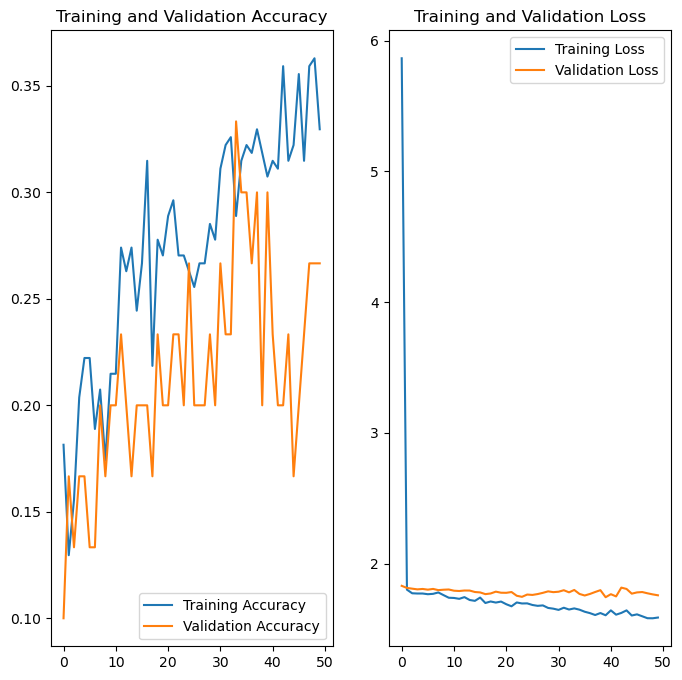

In [95]:
#doctor 
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [96]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 226ms/step - loss: 1.7573 - accuracy: 0.2667


[1.7572636604309082, 0.2666666805744171]

In [97]:
p=model.predict(X_test)

1/1 [==============================] - 0s 359ms/step


In [98]:
np.argmax(p[5]) , np.argmax(y_test[5])


(2, 5)

In [99]:
# event_dict={
#  'elbow flexion': 1,
#  'elbow extension': 2,
#  'supination': 3,
#  'pronation': 4,
#  'hand close': 5,
#  'hand open': 6,
#  'rest': 7,
# }
event_dict={
 'Forward': 0,
 'Backward ': 1,
 'Left': 2,
 'Right': 3,
 'UP': 4,
 'Down': 5,
 'Rest': 6,
}

#d={1:0,2:1,3:2,4:3,5:4,6:5,7:6} previously used for preparing the labels

def get_event_name(n):

    for x,y in event_dict.items() :
        if y == n :
            return x

In [100]:
get_event_name(np.argmax(p[5])) ,get_event_name(np.argmax(y_test[5]))

('Left', 'Down')

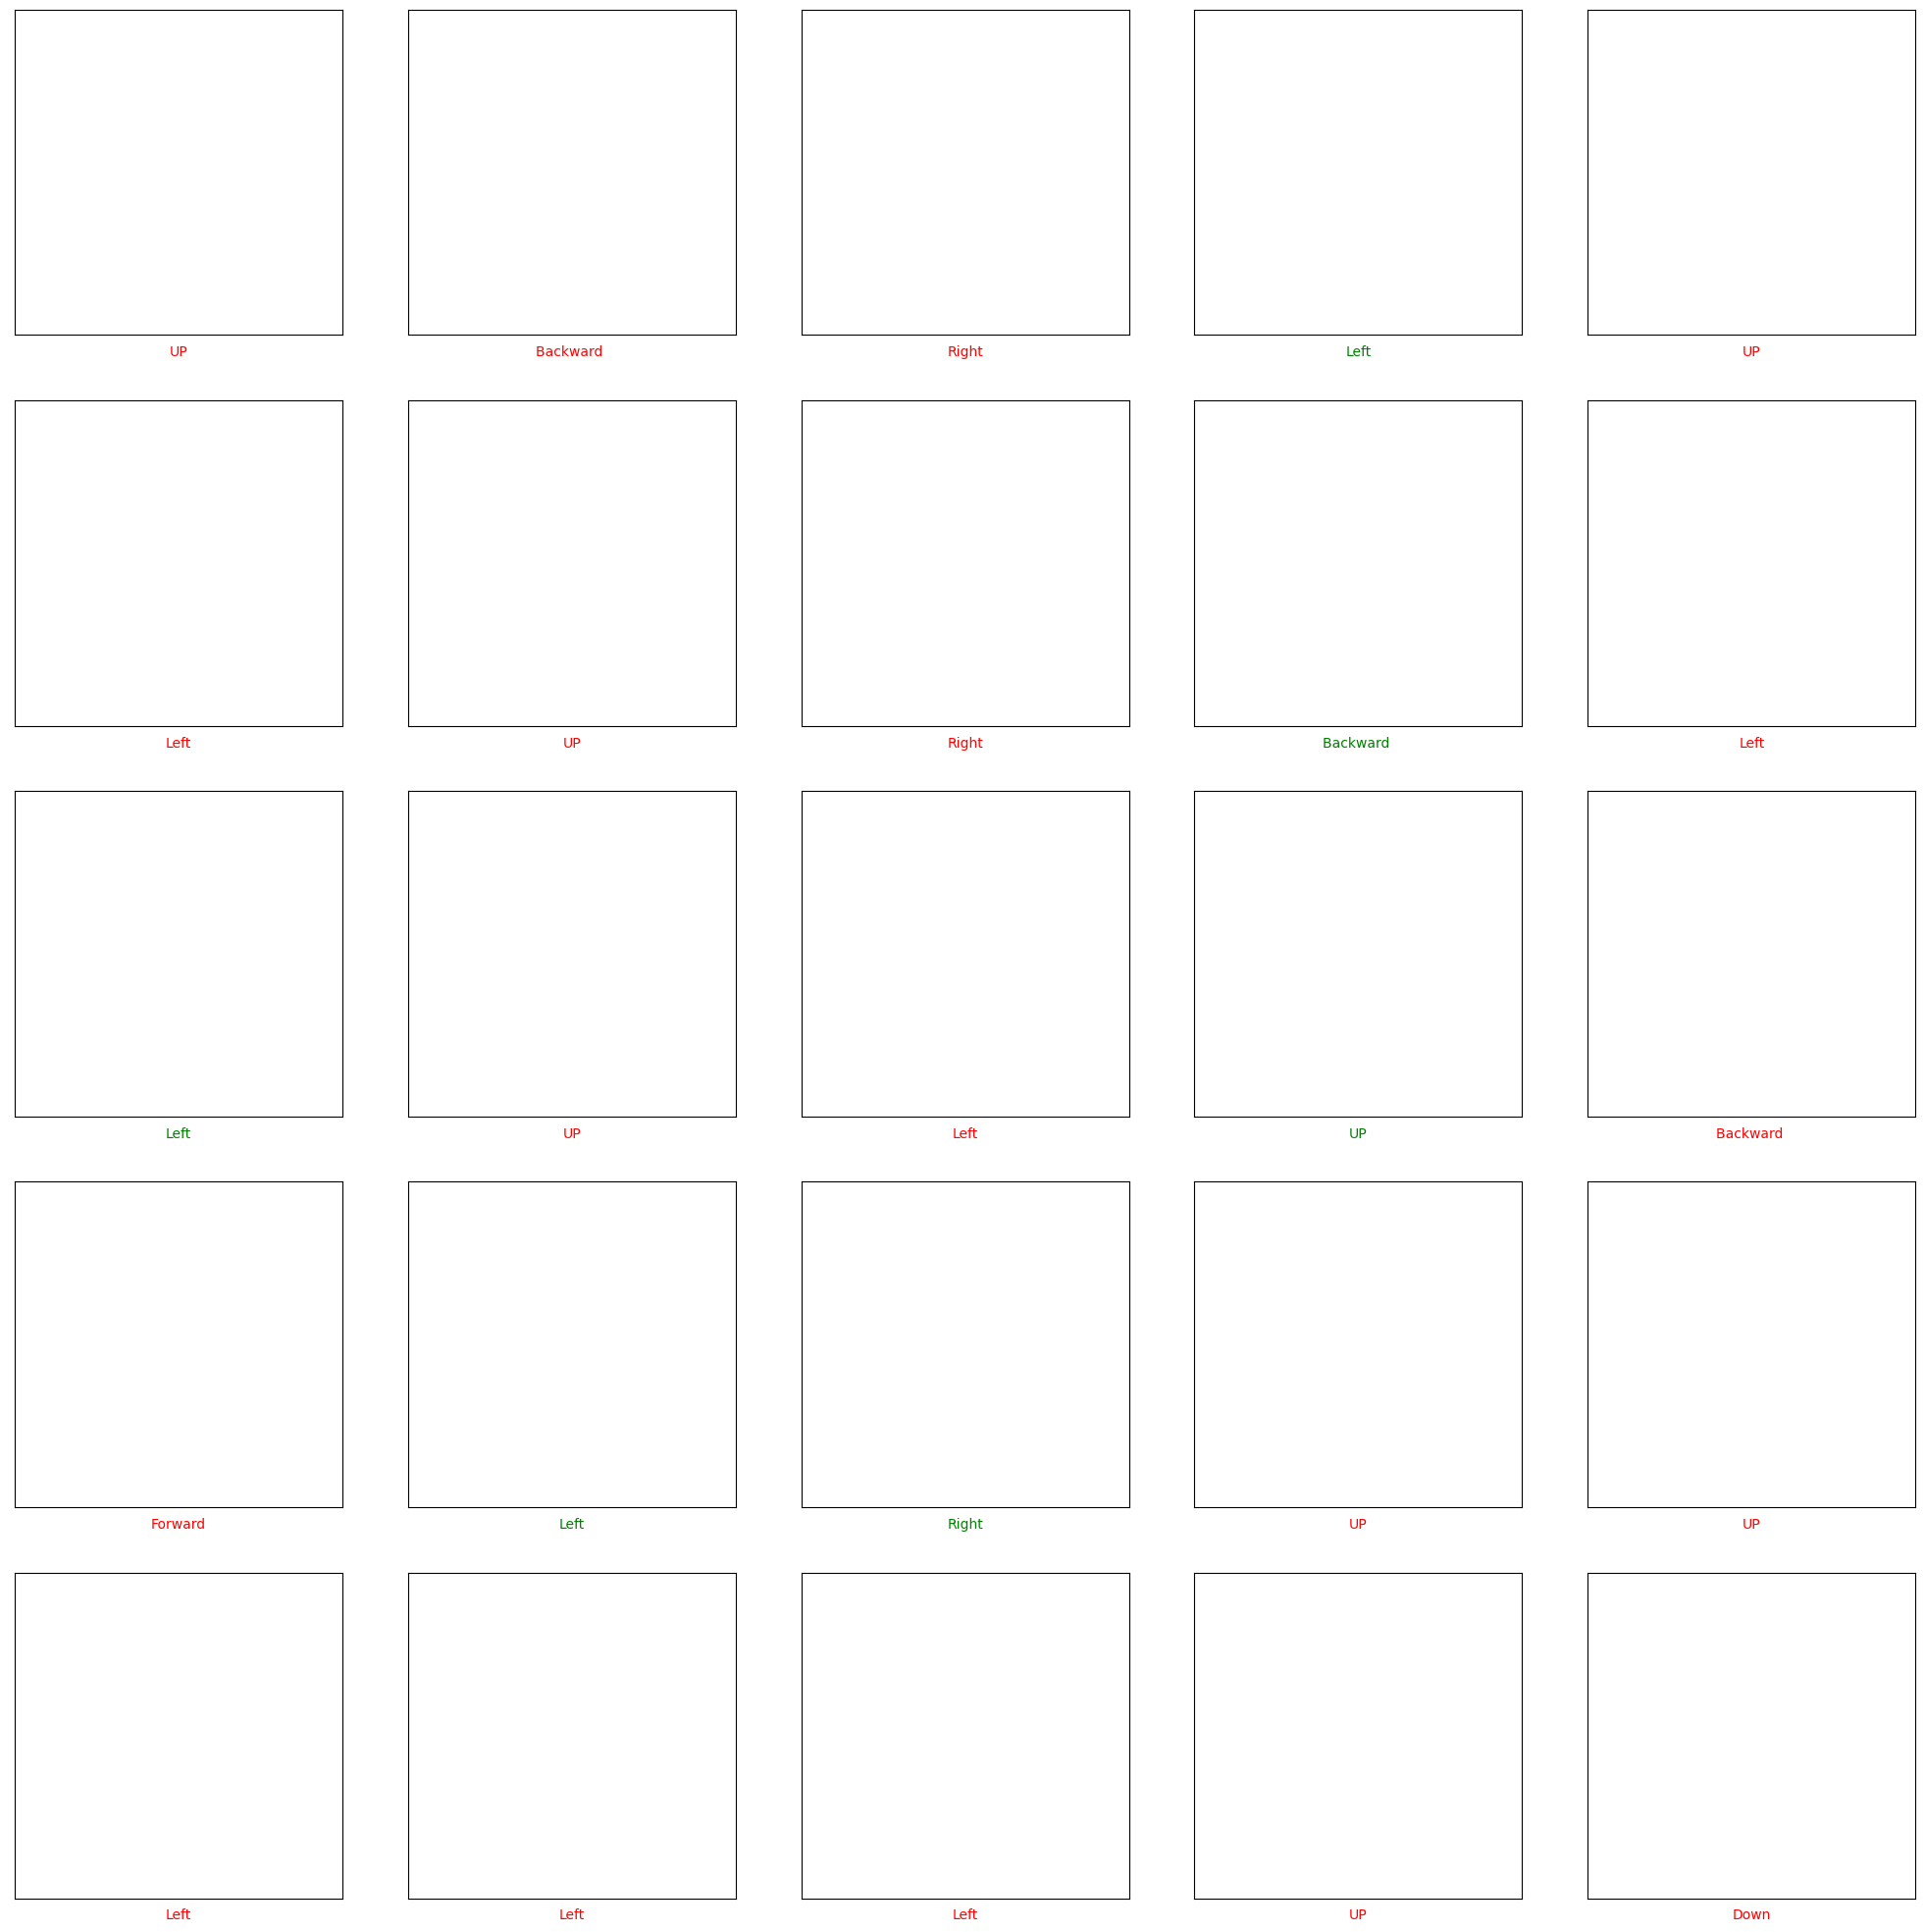

In [101]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
#     plt.imshow(X_val[i])
    color = 'green' if get_event_name(np.argmax(p[i])) == get_event_name(np.argmax(y_test[i])) else 'red'
    plt.xlabel(get_event_name(np.argmax(p[i])),color=color)
plt.show()

- `cross subject` ---> use all the data 
- try different filtering and preprocessing techniques with the CNN model
- try different deep learning models 

# starting from Friday

- Deployment
 - Simulator 